In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[0])  #可以通过下标进行选择适合自己的画图样式
from sklearn import datasets, svm
from sklearn.datasets import make_classification



In [25]:
# 两个信息特性，每个类一个集群
X, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, flip_y=0.5)


#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [26]:
###### 混淆测试集目标类别的 指定概率50%的错误
err = y_train
for i in range(int(len(err) * 0.5)):
    index = int(np.random.randint(len(err)))
    err[index] = 0 if err[index] == 1 else 1

In [27]:
# 查看测试集是否与未混淆后不同
print(np.sum(y_train>0) + np.sum(y_test>0), np.sum(y > 0))

45 48


In [28]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

# 测试集 计算平均值和标准偏差 缩放特征集
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)
# X = standardScaler.fit_transform(X)

svcs=linear
估计器的参数: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.72 
测试集R2评分: 0.88 
svcs=rbf
估计器的参数: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.7733333333333333 
测试集R2评分: 0.8 


C:\Users\yalin\AppData\Local\Temp/ipykernel_8064/3527485730.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
C:\Users\yalin\AppData\Local\Temp/ipykernel_8064/3527485730.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


svcs=poly
估计器的参数: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.6666666666666666 
测试集R2评分: 0.68 


C:\Users\yalin\AppData\Local\Temp/ipykernel_8064/3527485730.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


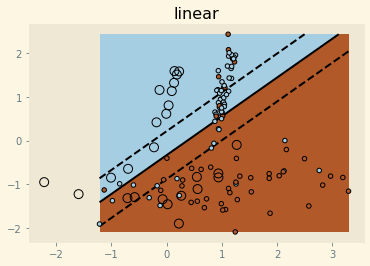

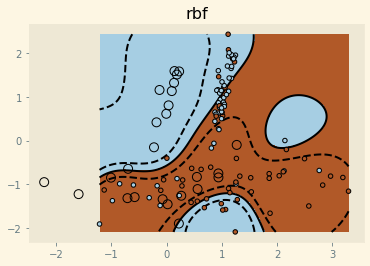

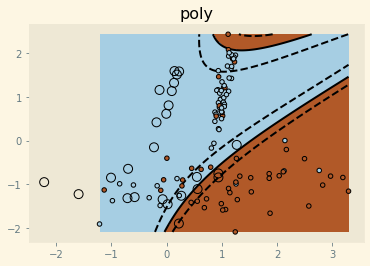

In [29]:
# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, C=10, gamma=1)
    clf.fit(X_train, y_train)

    performance = clf.fit(X_train, y_train.ravel())
    # 获取预测值
    y_test_pred = performance.predict(X_test)
    # 显示估计器
    print(f'svcs=%s' %( kernel))
    # 获取这个估计器的参数
    print(f'估计器的参数: %s' %(clf.get_params()))
    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集R2评分: %s ' % (performance.score(X_train, y_train)))
    print(f'测试集R2评分: %s ' % (clf.score(X_test, y_test)))

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()
